## Let's test, that dataset1 annotations are converted correctly

In [2]:
import os
import cv2
import glob
import matplotlib.pyplot as plt
import random

In [3]:
def visualize_yolo(image_path, annotation_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width, _ = image.shape

    with open(annotation_path, "r") as f:
        lines = f.readlines()

    for line in lines:
        parts = line.strip().split()
        class_id = int(parts[0])
        x_center, y_center, w, h = map(float, parts[1:])

        x_center, y_center, w, h = (
            int(x_center * width),
            int(y_center * height),
            int(w * width),
            int(h * height),
        )
        x1, y1 = x_center - w // 2, y_center - h // 2
        x2, y2 = x_center + w // 2, y_center + h // 2

        cv2.rectangle(image, (x1, y1), (x2, y2), (255, 0, 0), 2)
        label = class_names[class_id] if class_id < len(class_names) else f"Class {class_id}"
        cv2.putText(image, label, (x1, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis("off")
    plt.show()


In [4]:
image_folder = "dataset1/images"
annotation_folder = "dataset1/annotations"

image_files = sorted(glob.glob(os.path.join(image_folder, "*.png")))
annotation_files = sorted(glob.glob(os.path.join(annotation_folder, "*.txt")))

class_names = ["trafficlight", "stop", "speedlimit", "crosswalk"]

Image: road405.png


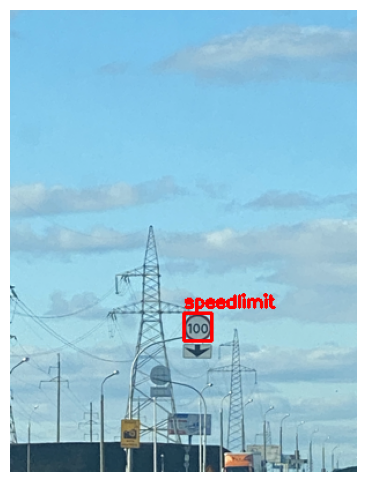

Image: road331.png


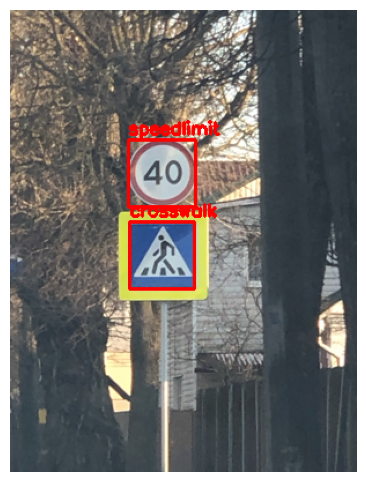

Image: road63.png


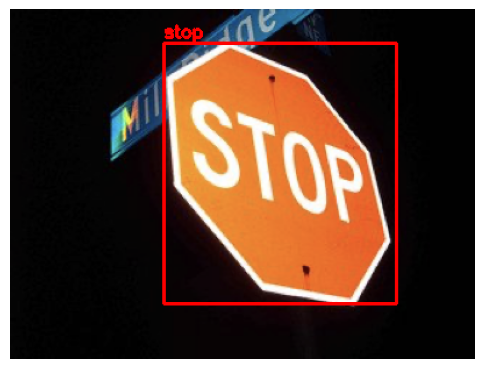

Image: road848.png


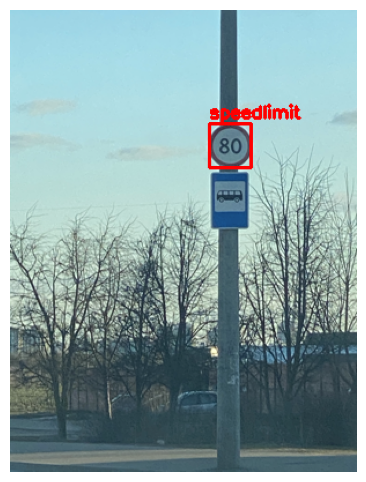

Image: road844.png


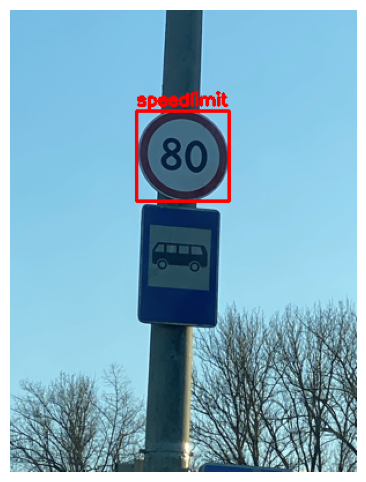

In [7]:
num_images = min(5, len(image_files))
random_indices = random.sample(range(len(image_files)), num_images)

for i in random_indices:
    print(f"Image: {os.path.basename(image_files[i])}")
    visualize_yolo(image_files[i], annotation_files[i])

## Let's also look into dataset2

In [7]:
image_folder = "dataset2/train/images"
annotation_folder = "dataset2/train/labels"

image_files = sorted(glob.glob(os.path.join(image_folder, "*.jpg")))
annotation_files = sorted(glob.glob(os.path.join(annotation_folder, "*.txt")))

class_names = ["Green Light", "Red Light", "Speed Limit 10", "Speed Limit 100", "Speed Limit 110", 
 "Speed Limit 120", "Speed Limit 20", "Speed Limit 30", "Speed Limit 40", 
 "Speed Limit 50", "Speed Limit 60", "Speed Limit 70", "Speed Limit 80", 
 "Speed Limit 90", "Stop"]


Image: 00004_00007_00008_png.rf.8bfdc4d9d975ce809b5fddb920a150d5.jpg


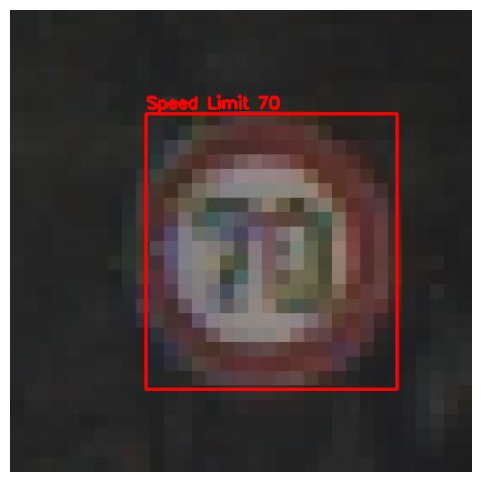

Image: road378_png.rf.8e1930c5fe7f025e1a7bdf1c51bcc245.jpg


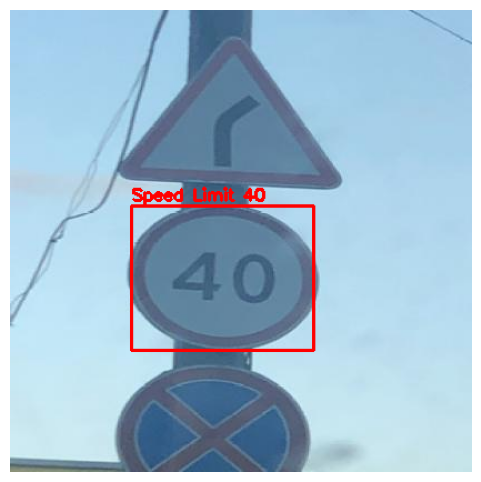

Image: 14352fa8-7a08-4804-b2b6-180ce0d0bd7f_jpg.rf.57ee5b49fe7509e69d8fa4b3404af3dd.jpg


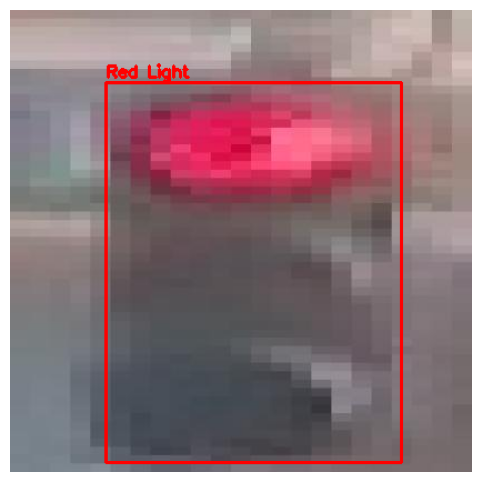

Image: 000780_jpg.rf.379c8ac00b774f9ede5636c05174f383.jpg


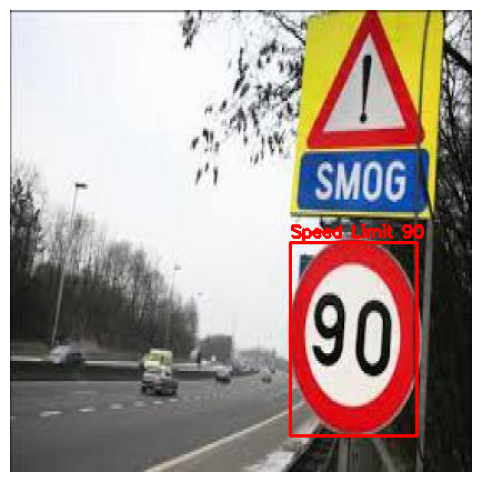

Image: 00004_00052_00005_png.rf.035a69797f3bab3eeaeb9b648b2af5fe.jpg


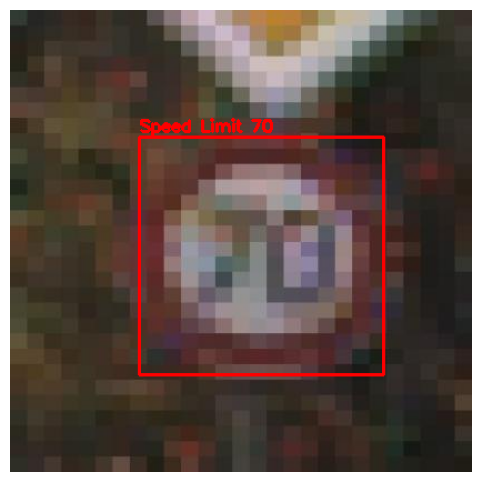

In [8]:
num_images = min(5, len(image_files))
random_indices = random.sample(range(len(image_files)), num_images)

for i in random_indices:
    print(f"Image: {os.path.basename(image_files[i])}")
    visualize_yolo(image_files[i], annotation_files[i])